In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constantes
mu0 = 4 * np.pi * 1e-7
I = 1
R = 10
r = 2
N = 70

# Rango de variables
phi_range = np.linspace(0, 2 * np.pi, N)
theta_range = np.linspace(0, 2 * np.pi, N)

# Puntos para calcular el campo magnético
x_obs, y_obs, z_obs = np.meshgrid(np.linspace(-15, 15, 10),
                                  np.linspace(-15, 15, 10),
                                  np.linspace(-15, 15, 10))

Bx = np.zeros(x_obs.shape)
By = np.zeros(y_obs.shape)
Bz = np.zeros(z_obs.shape)

# Calcular el campo magnético en cada punto de la rejilla
for i in range(x_obs.size):
    Bx_total = 0
    By_total = 0
    Bz_total = 0
    
    for phi in phi_range:
        for theta in theta_range:
            
            x = (R + r * np.cos(theta)) * np.cos(phi)
            y = (R + r * np.cos(theta)) * np.sin(phi)
            z = r * np.sin(theta)
            
            # Diferenciales dl_phi y dl_theta
            dl_phi = np.array([-(R + r * np.cos(theta)) * np.sin(phi),
                                (R + r * np.cos(theta)) * np.cos(phi),
                                0]) * (2 * np.pi / N)
                   
            dl_theta = np.array([-r * np.sin(theta) * np.cos(phi),
                                 -r * np.sin(theta) * np.sin(phi),
                                  r * np.cos(theta)]) * (2 * np.pi / N)
                      
            # Diferencial total dl
            dl = dl_phi + dl_theta
            
            # Vector de posición hasta el punto de observación
            rx = x_obs.flat[i] - x
            ry = y_obs.flat[i] - y
            rz = z_obs.flat[i] - z
            r_vec = np.array([rx, ry, rz])
            
            # Magnitud de r_vec
            r_mag = np.linalg.norm(r_vec)
            
            # Calcular el producto cruzado dl x r_vec
            dB = (mu0 * I / (4 * np.pi)) * np.cross(dl, r_vec) / (r_mag**3)
            
            # Sumar las contribuciones al campo magnético total
            Bx_total += dB[0]
            By_total += dB[1]
            Bz_total += dB[2]
    
    # Guardar los valores calculados
    Bx.flat[i] = Bx_total
    By.flat[i] = By_total
    Bz.flat[i] = Bz_total

# Graficar el campo magnético
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(x_obs, y_obs, z_obs, Bx, By, Bz, length=1.5, normalize=True)
ax.set_title('Campo Magnético del Toroide')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_box_aspect([1,1,1])  # Igualar las escalas de los ejes
plt.grid(True)
plt.show()

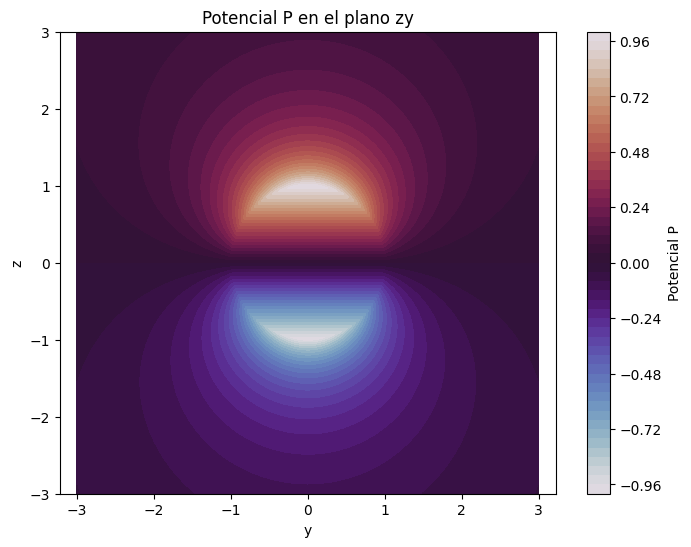

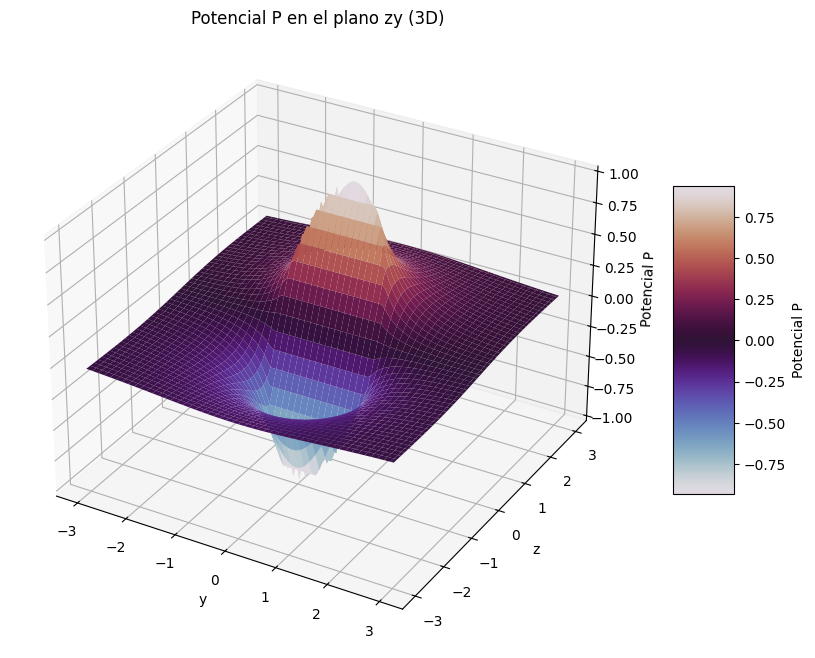